In [1]:
# author: Fahim Tajwar
from read_data_file import *
from util import *
from logistic_regression_scikit import *

In [2]:
file_name = "/Users/fahimtajwar/Academics/CS229A/Project_Data/data/fdadatafinal.xlsx"
dataset_reader = Dataset_Reader(file_name, "excel")
dataset_divider = Dataset_Divider(dataset_reader)

In [3]:
print(dataset_divider.total_dataset.get_number_of_datapoints())
print(dataset_divider.training_dataset.get_number_of_datapoints())
class_distribution = dataset_divider.get_total_dataset().get_class_distribution()
print(class_distribution)

8079
4847
{0: 1393, 1: 5850, 2: 836}


In [4]:
model = LogRegModel()

In [5]:
training_dataset = dataset_divider.get_training_dataset()

X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
indices = [3, 4]
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

(4847, 2)
(4847,)


In [6]:
model.train(X_train, y_train)

In [7]:
val_dataset = dataset_divider.get_validation_dataset()

X_val = val_dataset.get_X()
y_val = val_dataset.get_y()
X_val = X_val[:, indices]
print(X_val.shape)
print(y_val.shape)

(1615, 2)
(1615,)


In [8]:
print(model.get_accuracy(X_val, y_val))

0.24148606811145512


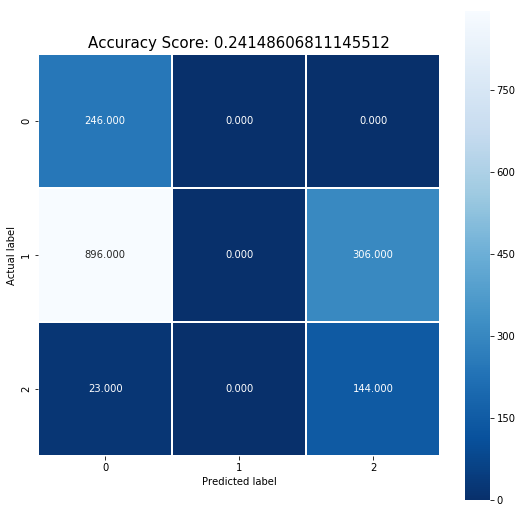

In [9]:
model.show_confusion_matrix(X_val, y_val)

(1615, 2)
(1615,)
{1: 0.0, 2: 0.8294117647058824, 0: 1.0}


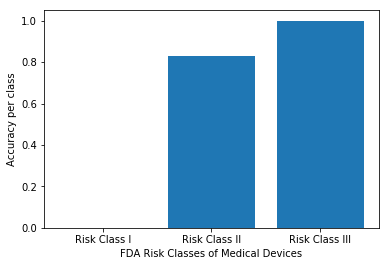

In [10]:
test_dataset = dataset_divider.get_test_dataset()

X_test = test_dataset.get_X()
y_test = test_dataset.get_y()
X_test = X_test[:, indices]
print(X_test.shape)
print(y_test.shape)

per_class_accuracy = model.get_accuracy_map_per_class(X_test, y_test)

label_for_each_class = ["Risk Class I", "Risk Class II", "Risk Class III"]
x_label = "FDA Risk Classes of Medical Devices"
y_label = "Accuracy per class"
print(per_class_accuracy)
plot_bar_graph_from_map(per_class_accuracy, x_label, y_label, label_for_each_class)

In [11]:
bn_reader = Binary_Even_Dataset_Reader(file_name, "excel")
total_dt = bn_reader.get_total_dataset()
print(total_dt.get_class_distribution())

{0: 7243, 1: 836}
{0: 836, 1: 836}


In [12]:
training_dataset = bn_reader.get_training_dataset()

X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

(1003, 2)
(1003,)


In [13]:
val_dataset = bn_reader.get_validation_dataset()

X_val = val_dataset.get_X()
y_val = val_dataset.get_y()
X_val = X_val[:, indices]
print(X_val.shape)
print(y_val.shape)

(334, 2)
(334,)


In [14]:
model = LogRegModel(multi_class_decision = 'ovr')

In [15]:
model.train(X_train, y_train)

In [16]:
model.get_accuracy(X_train, y_train)

0.8285144566301097

In [17]:
model.get_accuracy(X_val, y_val)

0.8083832335329342

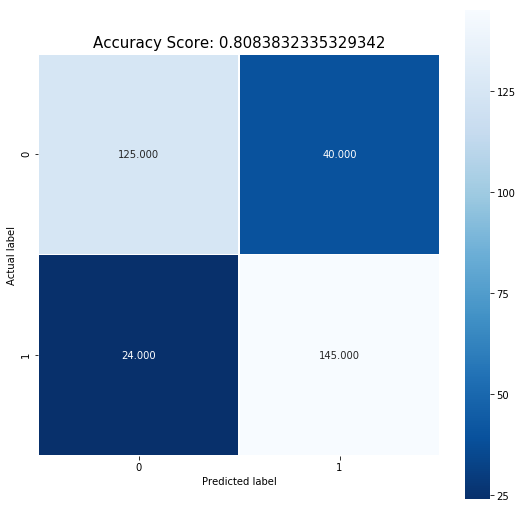

In [18]:
model.show_confusion_matrix(X_val, y_val)

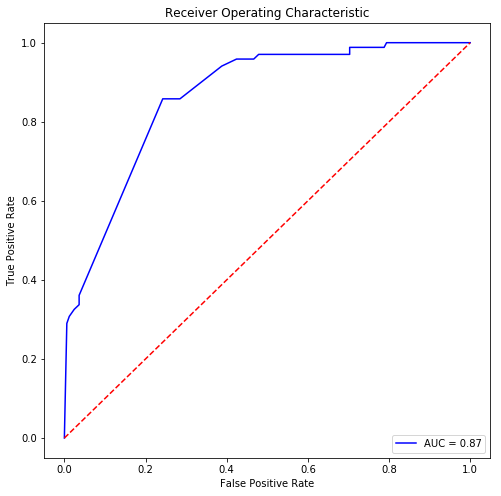

In [19]:
model.show_roc_curve(X_val, y_val)

In [20]:
model.get_model_statistics(X_val, y_val)

True Positive Rate:  0.8579881656804734
True Negative Rate:  0.7575757575757576
False Positive Rate:  0.24242424242424243
False Negative Rate:  0.14201183431952658
Precision :  0.7837837837837838
Recall :  0.8579881656804734
F1 Score :  0.8192090395480226
Accuracy :  0.8083832335329342


In [21]:
test_dataset = bn_reader.get_test_dataset()

X_test = test_dataset.get_X()
y_test = test_dataset.get_y()
X_test = X_test[:, indices]
print(X_test.shape)
print(y_test.shape)

(334, 2)
(334,)


1000
0.8192090395480226
0.811377245508982


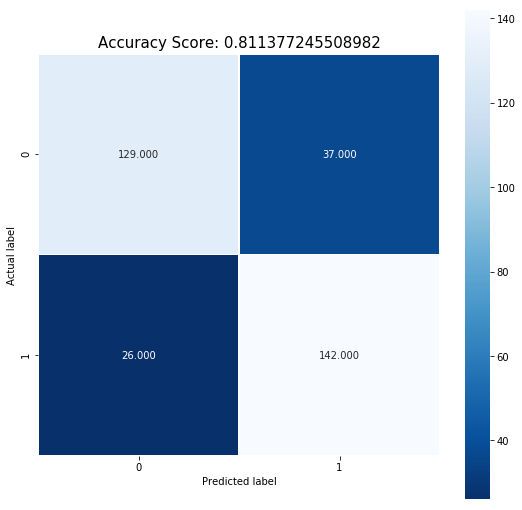

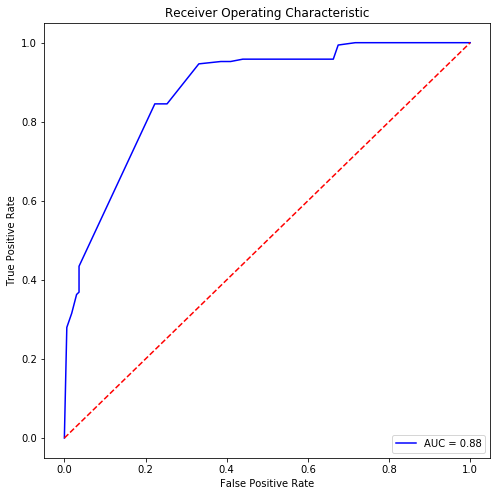

True Positive Rate:  0.8452380952380952
True Negative Rate:  0.7771084337349398
False Positive Rate:  0.22289156626506024
False Negative Rate:  0.15476190476190477
Precision :  0.7932960893854749
Recall :  0.8452380952380952
F1 Score :  0.8184438040345821
Accuracy :  0.811377245508982


In [22]:
C_values = [1000, 100, 30, 0.3, 0.1, 0.03, 0.01, 1, 3, 10]
validation_logistic(C_values, X_train, y_train, X_val, y_val, X_test, y_test)

In [23]:
# now we deal with the imbalanced class, and use a weighted model
bn_reader = Binary_Dataset_Reader(file_name, 'excel')

In [24]:
print(bn_reader.get_class_distribution())

{0: 7243, 1: 836}


In [25]:
training_dataset = bn_reader.get_training_dataset()
print(training_dataset.get_class_distribution())
X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

val_dataset = bn_reader.get_validation_dataset()

X_val = val_dataset.get_X()
y_val = val_dataset.get_y()
X_val = X_val[:, indices]
print(X_val.shape)
print(y_val.shape)

{0: 4340, 1: 507}
(4847, 2)
(4847,)
(1615, 2)
(1615,)


In [26]:
model = LogRegModel(multi_class_decision = 'ovr')
model.train(X_train, y_train)

In [27]:
print(model.get_accuracy(X_val, y_val))

0.7938080495356037


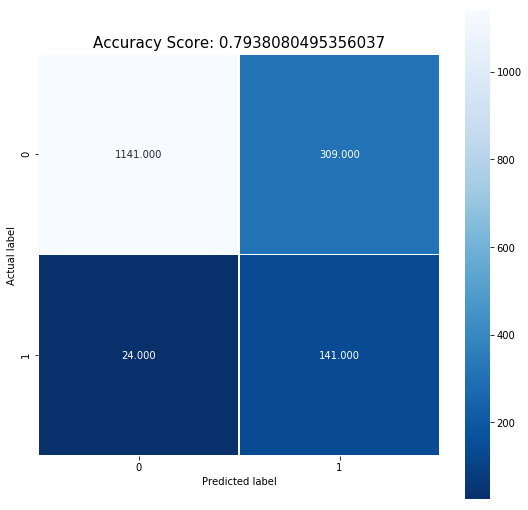

In [28]:
model.show_confusion_matrix(X_val, y_val)

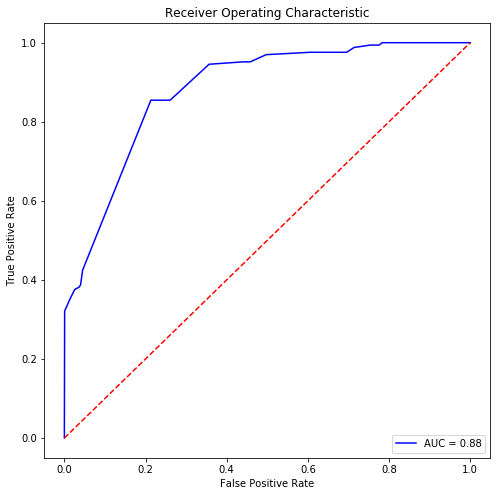

In [29]:
model.show_roc_curve(X_val, y_val)

In [30]:
model.get_model_statistics(X_val, y_val)

True Positive Rate:  0.8545454545454545
True Negative Rate:  0.786896551724138
False Positive Rate:  0.21310344827586203
False Negative Rate:  0.1454545454545455
Precision :  0.31333333333333335
Recall :  0.8545454545454545
F1 Score :  0.4585365853658536
Accuracy :  0.7938080495356037


In [31]:
test_dataset = bn_reader.get_test_dataset()

X_test = test_dataset.get_X()
y_test = test_dataset.get_y()
X_test = X_test[:, indices]
print(X_test.shape)
print(y_test.shape)

(1615, 2)
(1615,)


100000
0.4585365853658536
0.8018575851393189


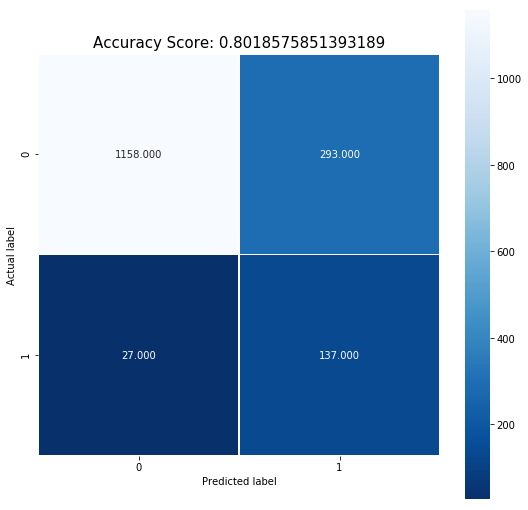

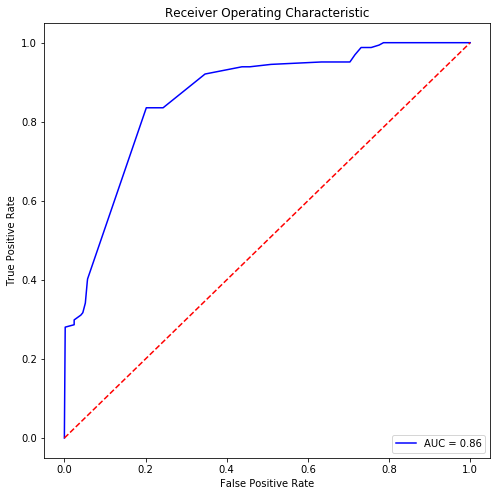

True Positive Rate:  0.8353658536585366
True Negative Rate:  0.7980702963473466
False Positive Rate:  0.2019297036526534
False Negative Rate:  0.16463414634146345
Precision :  0.3186046511627907
Recall :  0.8353658536585366
F1 Score :  0.4612794612794613
Accuracy :  0.8018575851393189


In [32]:
C_values = [100000, 100, 30, 0.3, 0.1, 0.03, 0.01, 1, 3, 10]
validation_logistic(C_values, X_train, y_train, X_val, y_val, X_test, y_test)